<a href="https://colab.research.google.com/github/ethanmcd77/FYP/blob/main/NFLDissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **An evaluation of a Quarterback's contribution to an NFL franchise in comparison with salary levels**

# Imports Below

In [192]:
import pandas as pd
import pandas.testing as tm
import numpy as np
from numpy import mean
from numpy import std
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import statsmodels.api as sm
import itertools
import time
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [268]:
df = pd.read_csv('NFLData.csv')
df = df.dropna()
df.head()

,Player,Tm,Salary,Age,Pos,G,GS,Qbrec,Cmp,Att,...,Tlosses,TeamPoints,ScorePerc,Pass Atts,TWinPer,SalaryCap,SalCapInf,AdjSalary,SuperBowl,Playoffs
0,Josh Rosen\RoseJo01,ARI,3.2,21.0,QB,14.0,13.0,03_10_2000,217.0,393.0,...,13.0,225.0,19.3,495.0,18.75,177.2,1.0,3.2,NO,0.0
1,Matt Ryan\RyanMa00,ATL,17.7,33.0,QB,16.0,16.0,07_09_2000,422.0,608.0,...,9.0,414.0,42.9,617.0,43.75,177.2,1.0,17.7,NO,0.0
3,Josh Allen\AlleJo02,BUF,3.9,22.0,QB,12.0,11.0,05_06_2000,169.0,320.0,...,10.0,269.0,26.4,499.0,37.50,177.2,1.0,3.9,NO,0.0
4,Cam Newton\NewtCa00,CAR,21.5,29.0,QB,14.0,14.0,06_08_2000,320.0,471.0,...,9.0,376.0,37.0,563.0,43.75,177.2,1.0,21.5,NO,0.0
5,Mitchell Trubisky*\TrubMi00,CHI,6.6,24.0,QB,14.0,14.0,11_03_2000,289.0,434.0,...,4.0,421.0,36.8,512.0,75.00,177.2,1.0,6.6,NO,1.0


To begin with Forwards & Backwards Selection on the two Quarterback metrics I dropped all columns which were not relevant in creating two seperate dataframes.

In [269]:
df_QBR = df.drop(['Rate', 'ANY_A', 'NY_A', 'AY_A', 'Player', 'Tm', 'Salary', 'Age', 'Pos', 'G', 'GS', 'Qbrec', 'Twins', 'Tlosses', 'TeamPoints', 'ScorePerc', 'Pass Atts', 'TWinPer', 'SalaryCap', 'SalCapInf', 'AdjSalary', 'SuperBowl', 'Playoffs'], axis = 1)
df_QBR= df_QBR.dropna()

In [270]:
df_Rate = df.drop(['QBR', 'ANY_A', 'NY_A', 'AY_A', 'Player', 'Tm', 'Salary', 'Age', 'Pos', 'G', 'GS', 'Qbrec', 'Twins', 'Tlosses', 'TeamPoints', 'ScorePerc', 'Pass Atts', 'TWinPer', 'SalaryCap', 'SalCapInf', 'AdjSalary', 'SuperBowl', 'Playoffs'], axis = 1)
df_Rate= df_Rate.dropna()

In [157]:
df_QBR.head()

,Cmp,Att,CmpPerc,Yds,TD,TDPerc,Int,IntPerc,Lng,Y_A,Y_C,Y_G,QBR,Sk,GYds,SkY,4QC,GWD
0,217.0,393.0,55.2,2278.0,11.0,2.8,14.0,3.6,75.0,5.8,10.5,162.7,26.6,45.0,320.0,10.3,1.0,2.0
1,422.0,608.0,69.4,4924.0,35.0,5.8,7.0,1.2,75.0,8.1,11.7,307.8,70.6,42.0,296.0,6.5,1.0,1.0
3,169.0,320.0,52.8,2074.0,10.0,3.1,12.0,3.8,75.0,6.5,12.3,172.8,52.3,28.0,213.0,8.0,2.0,3.0
4,320.0,471.0,67.9,3395.0,24.0,5.1,13.0,2.8,82.0,7.2,10.6,242.5,57.4,29.0,213.0,5.8,2.0,2.0
5,289.0,434.0,66.6,3223.0,24.0,5.5,12.0,2.8,70.0,7.4,11.2,230.2,72.8,24.0,143.0,5.2,1.0,2.0


In [271]:
y = df_QBR.QBR

X = df_QBR.drop(["QBR"], axis = 1).astype('float64')

# Begin Feature Selection Methods

In [103]:
def processSubset(feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [104]:
def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [105]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  17 models on 1 predictors in 0.04868054389953613 seconds.
Processed  16 models on 2 predictors in 0.03948831558227539 seconds.
Processed  15 models on 3 predictors in 0.03661823272705078 seconds.
Processed  14 models on 4 predictors in 0.03633761405944824 seconds.
Processed  13 models on 5 predictors in 0.038875579833984375 seconds.
Processed  12 models on 6 predictors in 0.05157136917114258 seconds.
Processed  11 models on 7 predictors in 0.03710341453552246 seconds.
Processed  10 models on 8 predictors in 0.03213167190551758 seconds.
Processed  9 models on 9 predictors in 0.0394291877746582 seconds.
Processed  8 models on 10 predictors in 0.02993321418762207 seconds.
Processed  7 models on 11 predictors in 0.025228023529052734 seconds.
Processed  6 models on 12 predictors in 0.023712873458862305 seconds.
Processed  5 models on 13 predictors in 0.021420955657958984 seconds.
Processed  4 models on 14 predictors in 0.01874852180480957 seconds.
Processed  3 models on 15 predic

In [106]:
print(models_fwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    QBR   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              4764.
Date:                Thu, 26 May 2022   Prob (F-statistic):                   1.70e-274
Time:                        20:09:44   Log-Likelihood:                         -960.87
No. Observations:                 293   AIC:                                      1932.
Df Residuals:                     288   BIC:                                      1950.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [272]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [273]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_A', 'Y_C', 'Y_G', 'Sk', 'GYds', 'SkY', '4QC')
('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_A', 'Y_C', 'Y_G', 'Sk', 'GYds', 'SkY', 'GWD')
('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_A', 'Y_C', 'Y_G', 'Sk', 'GYds', '4QC', 'GWD')
('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_A', 'Y_C', 'Y_G', 'Sk', 'SkY', '4QC', 'GWD')
('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_A', 'Y_C', 'Y_G', 'GYds', 'SkY', '4QC', 'GWD')
('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_A', 'Y_C', 'Sk', 'GYds', 'SkY', '4QC', 'GWD')
('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_A', 'Y_G', 'Sk', 'GYds', 'SkY', '4QC', 'GWD')
('Cmp', 'Att', 'CmpPerc', 'Yds', 'TD', 'TDPerc', 'Int', 'IntPerc', 'Lng', 'Y_C', 'Y_G', 'Sk', 'GYds', 'SkY', '4QC', 'GWD')
('Cmp', 'Att', '

In [274]:
print(models_bwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    QBR   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              4425.
Date:                Thu, 26 May 2022   Prob (F-statistic):                   6.11e-270
Time:                        23:56:55   Log-Likelihood:                         -971.54
No. Observations:                 293   AIC:                                      1953.
Df Residuals:                     288   BIC:                                      1971.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(205, 17) (205,)
(88, 17) (88,)


In [108]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [109]:
print(predictions[0:5])
print(y_test[0:5])

[56.43123767 72.72379365 44.52917958 56.44386104 57.13924492]
258    65.0
200    71.6
296    48.2
56     60.0
299    64.9
Name: QBR, dtype: float64


Score: 0.7115436632128652


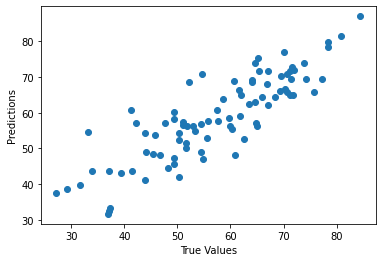

In [110]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print ("Score:", model.score(X_test, y_test))

In [111]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = linear_model.LinearRegression()
scores = cross_val_score(model, X, y , cv=cv, n_jobs=-1)
print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: 0.761 (0.072)


In [113]:
df_Rate.head()

,Cmp,Att,CmpPerc,Yds,TD,TDPerc,Int,IntPerc,Lng,Y_A,Y_C,Y_G,Rate,Sk,Yds.1,Sk.1,4QC,GWD
0,217.0,393.0,55.2,2278.0,11.0,2.8,14.0,3.6,75.0,5.8,10.5,162.7,66.7,45.0,320.0,10.3,1.0,2.0
1,422.0,608.0,69.4,4924.0,35.0,5.8,7.0,1.2,75.0,8.1,11.7,307.8,108.1,42.0,296.0,6.5,1.0,1.0
3,169.0,320.0,52.8,2074.0,10.0,3.1,12.0,3.8,75.0,6.5,12.3,172.8,67.9,28.0,213.0,8.0,2.0,3.0
4,320.0,471.0,67.9,3395.0,24.0,5.1,13.0,2.8,82.0,7.2,10.6,242.5,94.2,29.0,213.0,5.8,2.0,2.0
5,289.0,434.0,66.6,3223.0,24.0,5.5,12.0,2.8,70.0,7.4,11.2,230.2,95.4,24.0,143.0,5.2,1.0,2.0


In [114]:
y = df_Rate.Rate

X = df_Rate.drop(["Rate"], axis = 1).astype('float64')

In [115]:
def processSubset(feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [116]:
def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [117]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  17 models on 1 predictors in 0.2725491523742676 seconds.
Processed  16 models on 2 predictors in 0.06148791313171387 seconds.
Processed  15 models on 3 predictors in 0.056969642639160156 seconds.
Processed  14 models on 4 predictors in 0.05120205879211426 seconds.
Processed  13 models on 5 predictors in 0.04688572883605957 seconds.
Processed  12 models on 6 predictors in 0.0383152961730957 seconds.
Processed  11 models on 7 predictors in 0.03746747970581055 seconds.
Processed  10 models on 8 predictors in 0.03788924217224121 seconds.
Processed  9 models on 9 predictors in 0.03481912612915039 seconds.
Processed  8 models on 10 predictors in 0.027090072631835938 seconds.
Processed  7 models on 11 predictors in 0.032706499099731445 seconds.
Processed  6 models on 12 predictors in 0.025196552276611328 seconds.
Processed  5 models on 13 predictors in 0.024767637252807617 seconds.
Processed  4 models on 14 predictors in 0.020040273666381836 seconds.
Processed  3 models on 15 predi

In [118]:
print(models_fwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   Rate   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.267e+07
Date:                Thu, 26 May 2022   Prob (F-statistic):                        0.00
Time:                        20:10:46   Log-Likelihood:                          68.518
No. Observations:                 293   AIC:                                     -127.0
Df Residuals:                     288   BIC:                                     -108.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Linear Regression Charts Begin

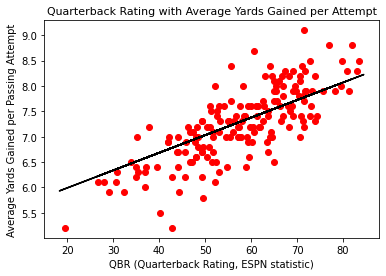

In [285]:
X_train, X_test, y_train, y_test = train_test_split(df_QBR.QBR, df_QBR.Y_A, test_size=0.6, random_state=2)
regressor = LinearRegression()

Fit1 = regressor.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = regressor.predict(np.array(X_train).reshape(-1,1))
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, y_pred, color = "black")
plt.title("Quarterback Rating with Average Yards Gained per Attempt", fontsize = 11)
plt.xlabel("QBR (Quarterback Rating, ESPN statistic)")
plt.ylabel("Average Yards Gained per Passing Attempt")
plt.show()

In [286]:
model = sm.OLS(X_train, y_train)

In [287]:
results = model.fit()
results.params

Y_A    7.910853
dtype: float64

In [288]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    QBR   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              3329.
Date:                Fri, 27 May 2022   Prob (F-statistic):                    2.89e-87
Time:                        00:05:17   Log-Likelihood:                         -444.44
No. Observations:                 117   AIC:                                      890.9
Df Residuals:                     116   BIC:                                      893.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

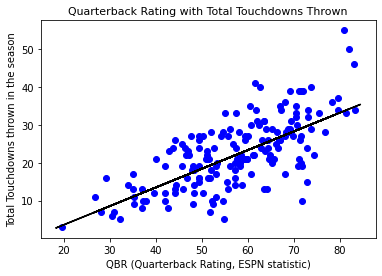

In [297]:
X_train, X_test, y_train, y_test = train_test_split(df_QBR.QBR, df_QBR.TD, test_size=0.6, random_state=2)
regressor = LinearRegression()

Fit = regressor.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = regressor.predict(np.array(X_train).reshape(-1,1))
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_train, y_pred, color = "black")
plt.title("Quarterback Rating with Total Touchdowns Thrown", fontsize = 11)
plt.xlabel("QBR (Quarterback Rating, ESPN statistic)")
plt.ylabel("Total Touchdowns thrown in the season")
plt.show()

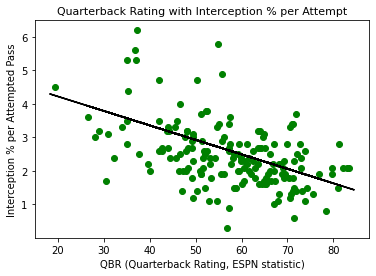

In [294]:
X_train, X_test, y_train, y_test = train_test_split(df_QBR.QBR, df_QBR.IntPerc, test_size=0.6, random_state=2)
regressor = LinearRegression()

Fit = regressor.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = regressor.predict(np.array(X_train).reshape(-1,1))
plt.scatter(X_test, y_test, color="green")
plt.plot(X_train, y_pred, color = "black")
plt.title("Quarterback Rating with Interception % per Attempt", fontsize = 11)
plt.xlabel("QBR (Quarterback Rating, ESPN statistic)")
plt.ylabel("Interception % per Attempted Pass")
plt.show()

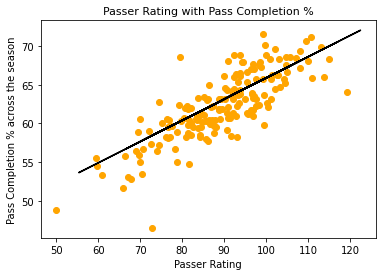

In [303]:
X_train, X_test, y_train, y_test = train_test_split(df_Rate.Rate, df_Rate.CmpPerc, test_size=0.6, random_state=2)
regressor = LinearRegression()

Fit = regressor.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = regressor.predict(np.array(X_train).reshape(-1,1))
plt.scatter(X_test, y_test, color="orange")
plt.plot(X_train, y_pred, color = "black")
plt.title("Passer Rating with Pass Completion %", fontsize = 11)
plt.xlabel("Passer Rating")
plt.ylabel("Pass Completion % across the season")
plt.show()

## Two seperate Quarterback Performance Metric dataframes, correlation matrix below

In [158]:
correlation_matrix = df_QBR.corr()
correlation_matrix["QBR"]

Cmp        0.522761
Att        0.414108
CmpPerc    0.658808
Yds        0.612024
TD         0.725847
TDPerc     0.751654
Int       -0.209129
IntPerc   -0.529089
Lng        0.276644
Y_A        0.737794
Y_C        0.364570
Y_G        0.612371
QBR        1.000000
Sk        -0.075809
GYds      -0.073742
SkY       -0.395758
4QC        0.202515
GWD        0.267581
Name: QBR, dtype: float64

In [159]:
correlation_matrix1 = df_Rate.corr()
correlation_matrix1["Rate"]

Cmp        0.525744
Att        0.382166
CmpPerc    0.801356
Yds        0.614872
TD         0.766206
TDPerc     0.834596
Int       -0.412927
IntPerc   -0.720840
Lng        0.278954
Y_A        0.833448
Y_C        0.358428
Y_G        0.634770
Rate       1.000000
Sk         0.108170
GYds       0.094750
SkY       -0.181830
4QC        0.168089
GWD        0.171696
Name: Rate, dtype: float64

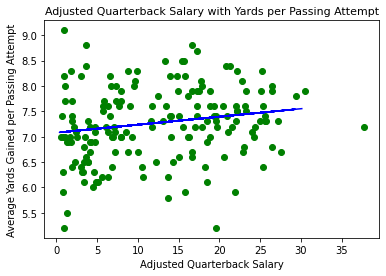

In [307]:
X_train, X_test, y_train, y_test = train_test_split(df.AdjSalary, df_Rate.Y_A, test_size=0.6, random_state=2)
regressor = LinearRegression()

Fit = regressor.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = regressor.predict(np.array(X_train).reshape(-1,1))
plt.scatter(X_test, y_test, color="green")
plt.plot(X_train, y_pred, color = "blue")
plt.title("Adjusted Quarterback Salary with Yards per Passing Attempt", fontsize = 11)
plt.xlabel("Adjusted Quarterback Salary")
plt.ylabel("Average Yards Gained per Passing Attempt")
plt.show()

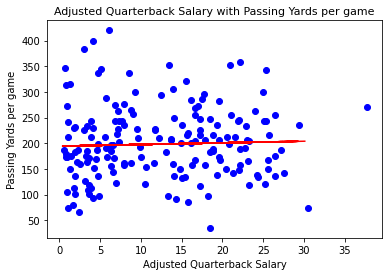

In [393]:
X_train, X_test, y_train, y_test = train_test_split(df.AdjSalary, df_Rate.GYds, test_size=0.6, random_state=2)
regressor = LinearRegression()

Fit = regressor.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = regressor.predict(np.array(X_train).reshape(-1,1))
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_train, y_pred, color = "red")
plt.title("Adjusted Quarterback Salary with Passing Yards per game", fontsize = 11)
plt.xlabel("Adjusted Quarterback Salary")
plt.ylabel("Passing Yards per game")
plt.show()

## Logistic Regression used on Adjusted Salary and Playoff Participation 

In [395]:
df1 =pd.read_csv('ContractPlayoff.csv')
X = df1.iloc[:, :-1].values
y = df1.iloc[:, 1].values
df1.head()

,AdjSalary,Playoffs
0,3.2,0
1,17.7,0
2,24.8,1
3,3.9,0
4,21.5,0


In [311]:
df1.groupby('AdjSalary').mean()

,Playoffs
AdjSalary,
0.4,0.000000
0.6,0.166667
0.7,0.400000
0.8,0.000000
0.9,0.000000
...,...
29.3,1.000000
29.4,0.000000
30.1,0.000000


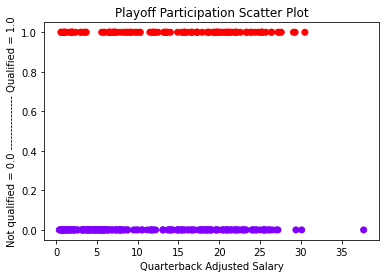

In [398]:
plt.scatter(X, y, c=y, cmap = "rainbow")
plt.title('Playoff Participation Scatter Plot')
plt.xlabel('Quarterback Adjusted Salary')
plt.ylabel('Not qualified = 0.0 --------------- Qualified = 1.0')
plt.show()

In [313]:
X_train, X_test, y_train, y_test = train_test_split(df1.AdjSalary, df1.Playoffs, test_size=0.2, random_state=2)

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(np.array(X_train).reshape(-1,1), y_train)

LogisticRegression()

In [315]:
 y_pred = log_reg.predict(np.array(X_test).reshape(-1,1))

In [316]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[43,  0],
       [20,  1]])

Text(0.5, 33.0, 'Predicted Values')

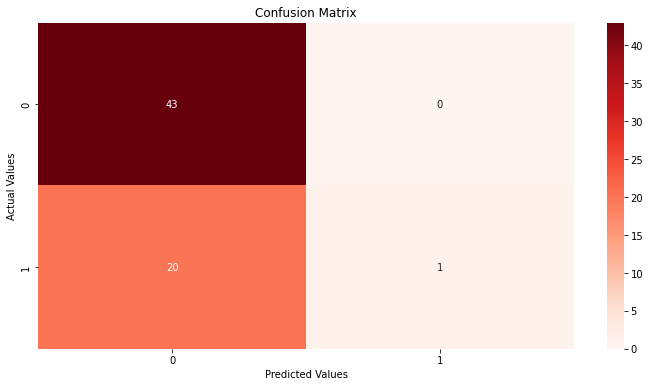

In [317]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [319]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        43
           1       1.00      0.05      0.09        21

    accuracy                           0.69        64
   macro avg       0.84      0.52      0.45        64
weighted avg       0.79      0.69      0.57        64



In [190]:
accuracy_score(y_test, y_pred)

0.6875

## Testing alternative machine learning algorithms in regards to the Playoff Participation success metric

In [320]:
df = pd.read_csv('NFLData.csv')
df = df.dropna()
df.head()

,Player,Tm,Salary,Age,Pos,G,GS,Qbrec,Cmp,Att,...,Tlosses,TeamPoints,ScorePerc,Pass Atts,TWinPer,SalaryCap,SalCapInf,AdjSalary,SuperBowl,Playoffs
0,Josh Rosen\RoseJo01,ARI,3.2,21.0,QB,14.0,13.0,03_10_2000,217.0,393.0,...,13.0,225.0,19.3,495.0,18.75,177.2,1.0,3.2,NO,0.0
1,Matt Ryan\RyanMa00,ATL,17.7,33.0,QB,16.0,16.0,07_09_2000,422.0,608.0,...,9.0,414.0,42.9,617.0,43.75,177.2,1.0,17.7,NO,0.0
3,Josh Allen\AlleJo02,BUF,3.9,22.0,QB,12.0,11.0,05_06_2000,169.0,320.0,...,10.0,269.0,26.4,499.0,37.50,177.2,1.0,3.9,NO,0.0
4,Cam Newton\NewtCa00,CAR,21.5,29.0,QB,14.0,14.0,06_08_2000,320.0,471.0,...,9.0,376.0,37.0,563.0,43.75,177.2,1.0,21.5,NO,0.0
5,Mitchell Trubisky*\TrubMi00,CHI,6.6,24.0,QB,14.0,14.0,11_03_2000,289.0,434.0,...,4.0,421.0,36.8,512.0,75.00,177.2,1.0,6.6,NO,1.0


## Feature Selection

In [399]:
df_clean = df.drop(['Player', 'Tm', 'Salary', 'Age', 'Pos', 'G', 'GS', 'Qbrec', 'SalaryCap', 'SalCapInf', 'SuperBowl'], axis = 1)


In [400]:
y = df_clean["Playoffs"]

X = df_clean.drop(["Playoffs"], axis = 1).astype('float64')
df_clean.head()

,Cmp,Att,CmpPerc,Yds,TD,TDPerc,Int,IntPerc,Lng,Y_A,...,4QC,GWD,Twins,Tlosses,TeamPoints,ScorePerc,Pass Atts,TWinPer,AdjSalary,Playoffs
0,217.0,393.0,55.2,2278.0,11.0,2.8,14.0,3.6,75.0,5.8,...,1.0,2.0,3.0,13.0,225.0,19.3,495.0,18.75,3.2,0.0
1,422.0,608.0,69.4,4924.0,35.0,5.8,7.0,1.2,75.0,8.1,...,1.0,1.0,7.0,9.0,414.0,42.9,617.0,43.75,17.7,0.0
3,169.0,320.0,52.8,2074.0,10.0,3.1,12.0,3.8,75.0,6.5,...,2.0,3.0,6.0,10.0,269.0,26.4,499.0,37.50,3.9,0.0
4,320.0,471.0,67.9,3395.0,24.0,5.1,13.0,2.8,82.0,7.2,...,2.0,2.0,7.0,9.0,376.0,37.0,563.0,43.75,21.5,0.0
5,289.0,434.0,66.6,3223.0,24.0,5.5,12.0,2.8,70.0,7.4,...,1.0,2.0,12.0,4.0,421.0,36.8,512.0,75.00,6.6,1.0


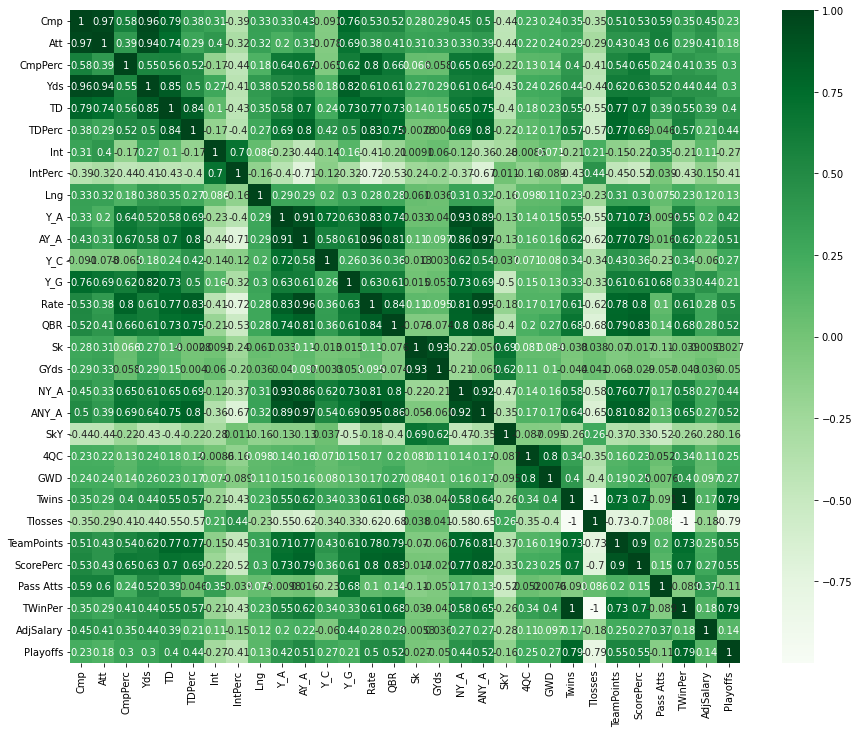

In [404]:
plt.figure(figsize=(15,12))
cor1 = df_clean.corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Greens)
plt.show()

In [335]:
target = abs(cor1['Playoffs'])

relevant_features = target[target>0.4]
relevant_features = relevant_features.drop('Playoffs')
relevant_features

TD            0.403727
TDPerc        0.441378
IntPerc       0.413987
Y_A           0.420442
AY_A          0.510448
Rate          0.499199
QBR           0.515783
NY_A          0.435571
ANY_A         0.520054
Twins         0.788963
Tlosses       0.787346
TeamPoints    0.554108
ScorePerc     0.554503
TWinPer       0.788928
Name: Playoffs, dtype: float64

In [336]:
variables = ['TD','TDPerc','IntPerc','Y_A','AY_A','Rate','QBR','NY_A','ANY_A','Twins','Tlosses','TeamPoints','ScorePerc','TWinPer']

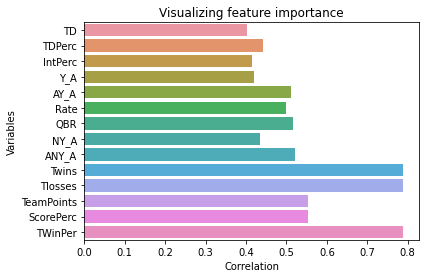

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=relevant_features, y=variables)
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title("Visualizing feature importance")
plt.show()

## Decision Tree Classifier

In [338]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [339]:
DFvar = df_clean[df_clean.columns.intersection(variables)]
DFvar.head()

,TD,TDPerc,IntPerc,Y_A,AY_A,Rate,QBR,NY_A,ANY_A,Twins,Tlosses,TeamPoints,ScorePerc,TWinPer
0,11.0,2.8,3.6,5.8,4.8,66.7,26.6,4.47,3.53,3.0,13.0,225.0,19.3,18.75
1,35.0,5.8,1.2,8.1,8.7,108.1,70.6,7.12,7.71,7.0,9.0,414.0,42.9,43.75
3,10.0,3.1,3.8,6.5,5.4,67.9,52.3,5.35,4.37,6.0,10.0,269.0,26.4,37.50
4,24.0,5.1,2.8,7.2,7.0,94.2,57.4,6.36,6.15,7.0,9.0,376.0,37.0,43.75
5,24.0,5.5,2.8,7.4,7.3,95.4,72.8,6.72,6.59,12.0,4.0,421.0,36.8,75.00


In [340]:
X = DFvar
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

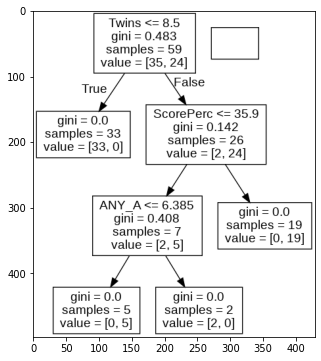

In [343]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_test, y_test)
data = tree.export_graphviz(dtree, out_file=None, feature_names=variables)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.gcf().set_size_inches(8, 6)
plt.show()

In [350]:
from sklearn import metrics
res_pred = dtree.predict(X_train)
score = accuracy_score(y_train, res_pred)
print('Accuracy:', score)
print("Precision:",metrics.precision_score(y_train, res_pred))
print("Recall:",metrics.recall_score(y_train, res_pred))
print("f1:",metrics.f1_score(y_train,res_pred))

Accuracy: 0.8760683760683761
Precision: 0.8282828282828283
Recall: 0.8723404255319149
f1: 0.8497409326424871


## Random Forest Classifier

In [366]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=20, random_state=10)
forest_clf.fit(X_train,y_train)
y_pred= forest_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9152542372881356
Precision: 0.9523809523809523
Recall: 0.8333333333333334
f1: 0.888888888888889


# Naive Bayes Classifier

In [368]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [369]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.8983050847457628


## KNN (K Nearest-Neighbours)

In [381]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [382]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [383]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_pred1 = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_pred1)
rmse = sqrt(mse)
rmse

0.20441471355728885

In [384]:
test_pred1 = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_pred1)
rmse = sqrt(mse)
rmse

0.33049640230982297

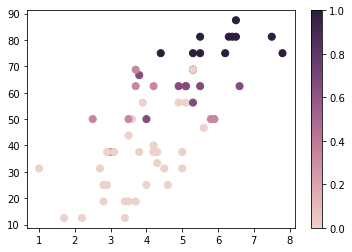

In [386]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 1], X_test.iloc[:, 13], c=test_pred1, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Tuning and Optimising KNN

In [387]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [388]:
gridsearch.best_params_

{'n_neighbors': 5}

In [389]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(train_rmse)

print(test_rmse)

0.2313099079250033
0.26933691332855947


In [390]:
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [391]:
gridsearch.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [392]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.2773948149835211